## Probability Distributions in Machine Learning

We start by importing the necesary python libraries:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Uniform

The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain: 

In [2]:
u = np.random.uniform(size=10000)

In [3]:
sns.set_style('ticks')

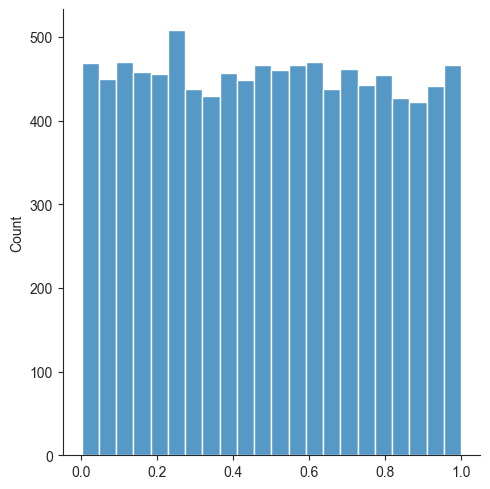

In [4]:
_ = sns.displot(u)

Real-world examples include: 

* Dice rolling (PMF)
* Card drawing (PMF)
* Hyperparameters of an ML model
* Emission of radioactive particles
* Economic demand 
* Analog-to-digital signal quantization errors

### Gaussian

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**: 

In [5]:
x = np.random.normal(size=10000)

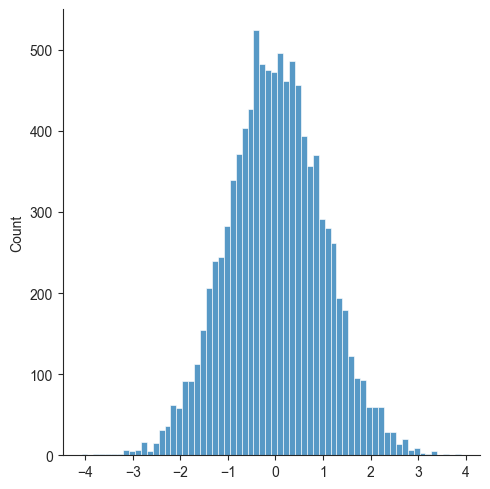

In [6]:
_ = sns.displot(x)

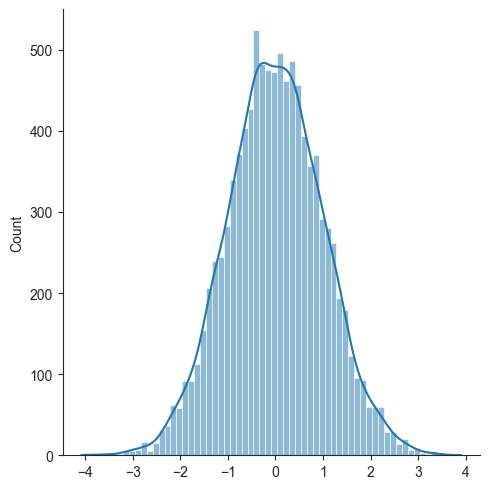

In [7]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [8]:
np.mean(x)

-0.000947924858542332

In [9]:
np.std(x)

1.0020576674578583

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$. 

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

Real-world examples include: 

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

In many cases the normal distribution is a good approximation for the combination of many discrete random variables. For example the distribution of the result of 100 coin flips can be approximated as a normal distribution: 

In [10]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

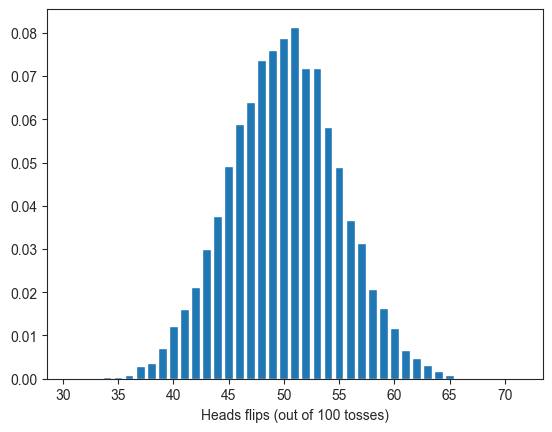

In [11]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

### The Central Limit Theorem

The central limit theorem says that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough. Regardless of whether the population has a normal, Poisson, binomial, or any other distribution, the sampling distribution of the mean will be normal.

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [12]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 1.18028443,  1.31636532,  0.58427523, -0.50534383, -0.25185725,
       -0.30373211,  2.01308012,  0.57784721,  1.02751971, -1.45380523])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [13]:
np.mean(x_sample)

0.4184633607896616

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [14]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

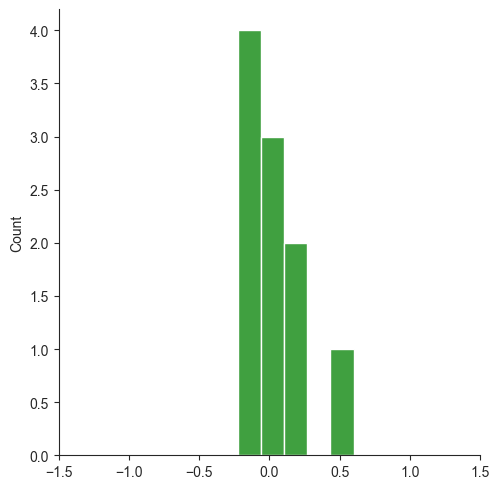

In [15]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

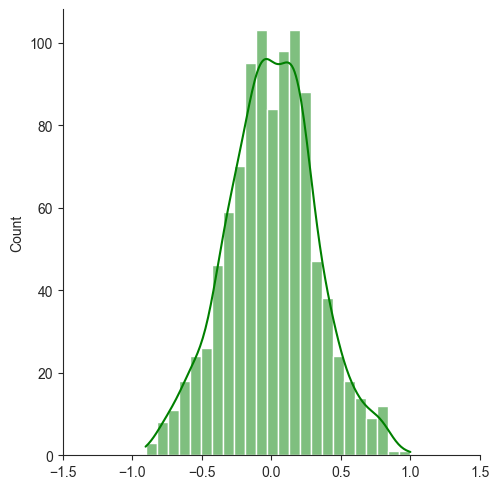

In [16]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

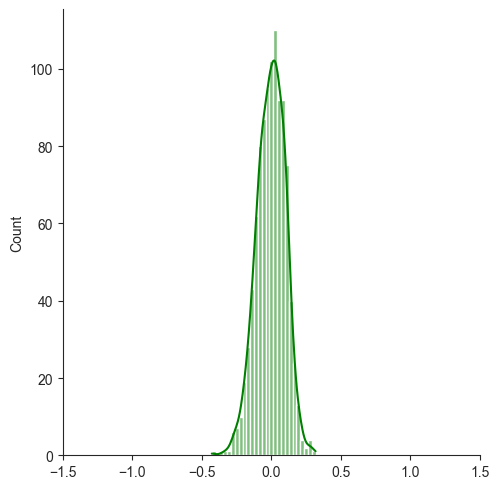

In [17]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

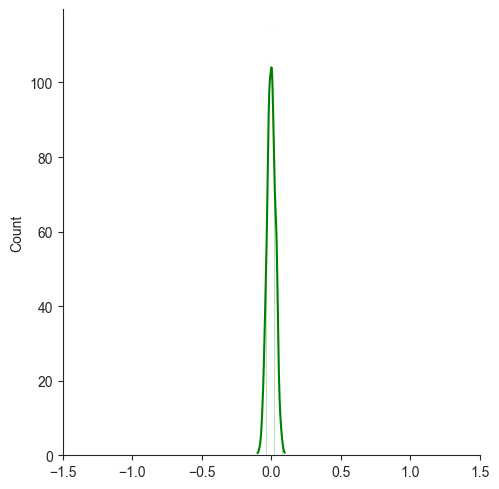

In [18]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution
Even if the original distribution is not symmetrical (*skewed*) the mean follows a normal distribution.

In [19]:
s = st.skewnorm.rvs(10, size=10000)

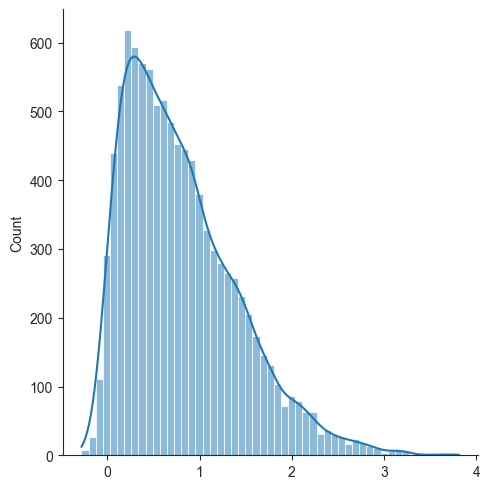

In [20]:
_ = sns.displot(s, kde=True)

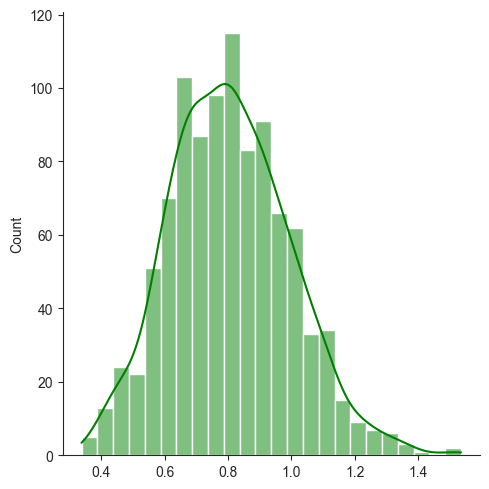

In [21]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

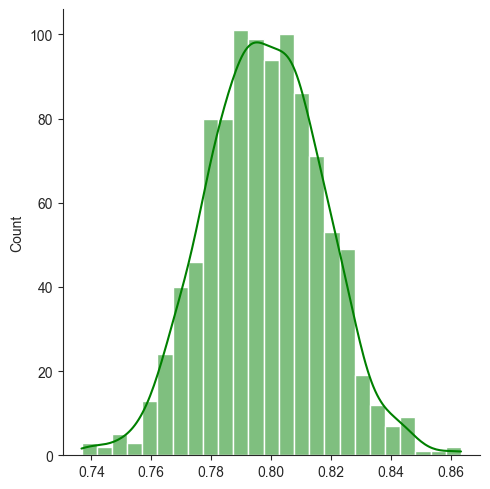

In [22]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [23]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

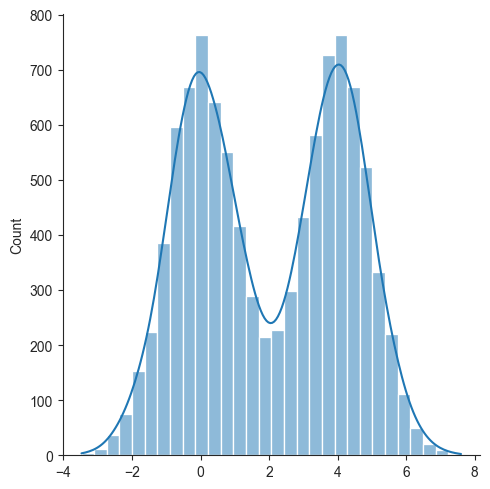

In [24]:
_ = sns.displot(m, kde=True)

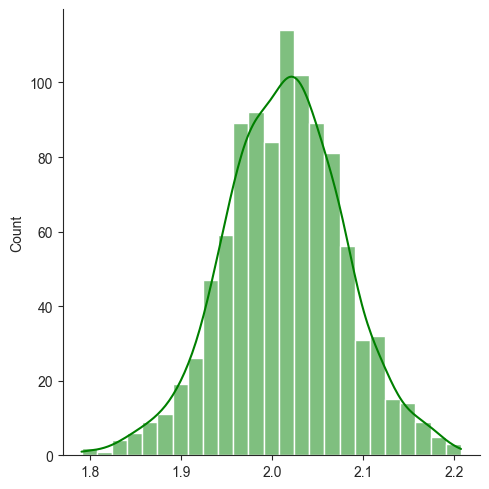

In [25]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

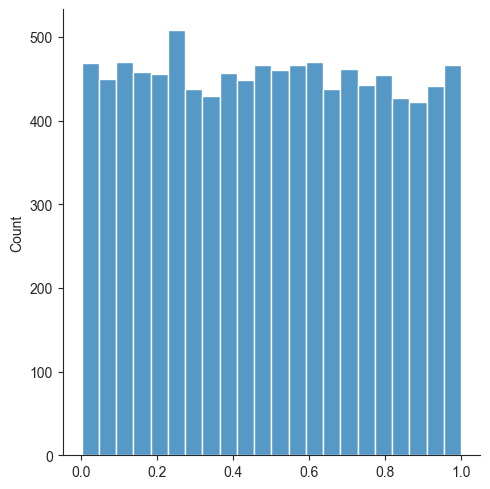

In [26]:
_ = sns.displot(u)

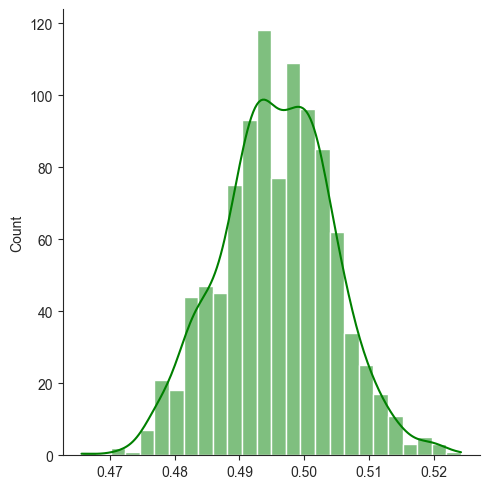

In [27]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed data, which is often the default assumption.

(Despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.)

(Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)

### Log-Normal Distribution

The natural logarithm of the **log-normal** distribution is normally distributed: 

In [28]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1

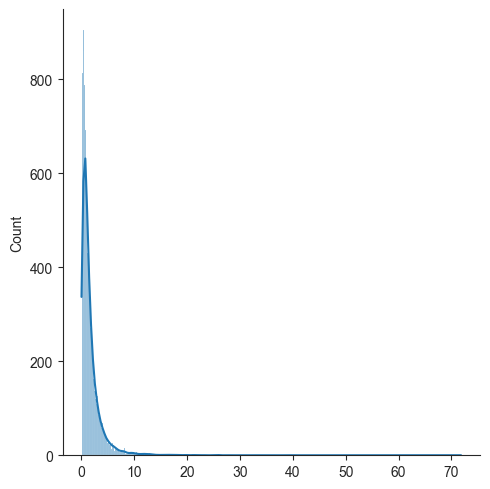

In [29]:
_ = sns.displot(x, kde=True)

The logarithm of the random variables follows a normal distribution:

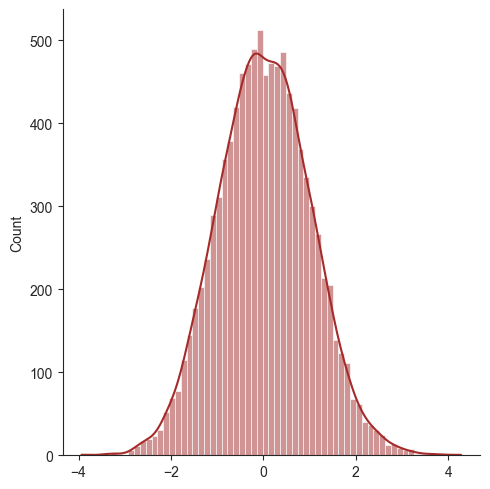

In [30]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Income
* Length of comments in online forums
* Duration of chess games or Rubik's Cube solves
* Size of publicly-available video files 
* Number of hospitalized cases in an epidemic where public interventions are involved

### Exponential Distribution

Relatively squished up against zero and then decreases exponentially toward higher values. 

In [31]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

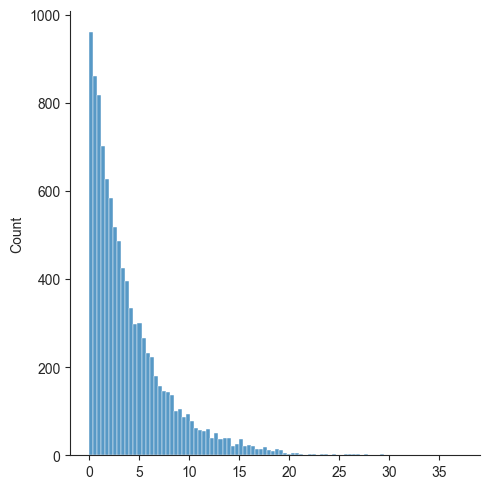

In [32]:
_ = sns.displot(x)

Its logarithm has a skewed distribution: 

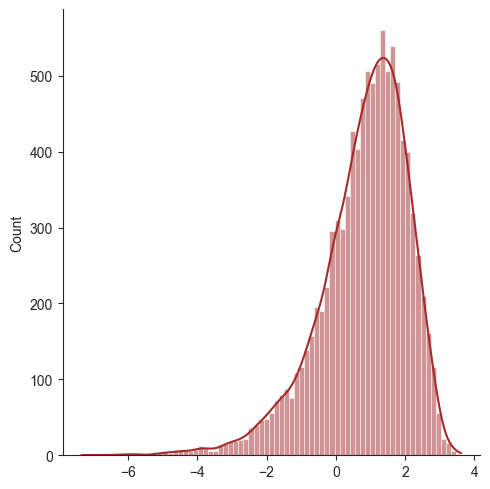

In [33]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

### Laplace Distribution

Named after Pierre-Simon Laplace alternatively referred to as the "double exponential distribution".

In [34]:
x = np.random.laplace(size=10000)

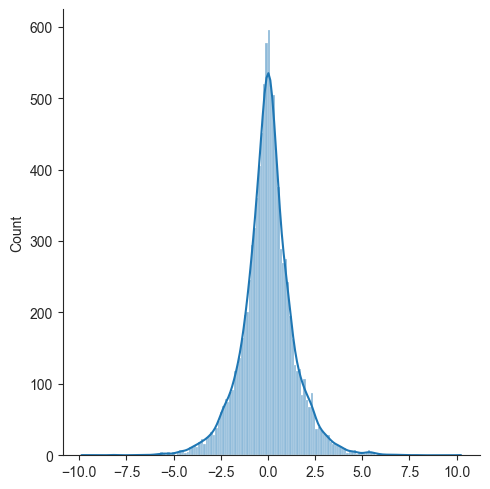

In [35]:
_ = sns.displot(x, kde=True)

In addition to the scale parameter of the exponential function, it has a location parameter that allows it to be centered on any value: 

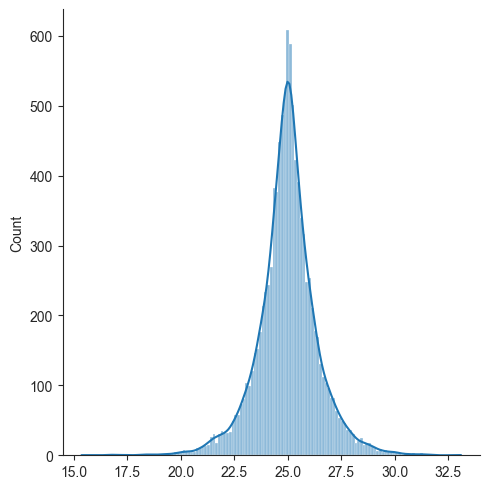

In [36]:
_ = sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

Real-world examples: 

* Extreme weather events, e.g., maximum rainfall in a day
* Many machine learning applications; wherever an acute peak of probability is desired

### Binomial Distribution

All distributions so far have been for continuous variables. This one is discrete. 

We've already been using it for coin flips; it's used for binary (0 or 1) outcome. 

Its parameters are: 

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [37]:
n = 5
n_experiments = 1000

#### Fair coin (p = 0.5)

In [38]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

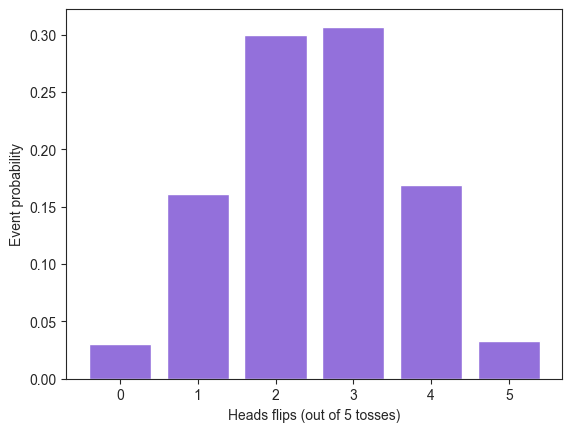

In [39]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

#### Weighted coin (p = 0.8)

In [40]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

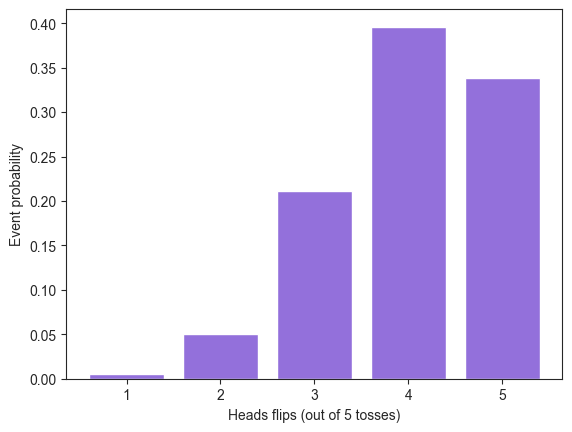

In [41]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Technically, binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$: 

In [42]:
np.random.binomial(1, 0.5)

0

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

### Multinomial Distribution

Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die: 

In [43]:
n = 1000

In [44]:
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([159, 162, 161, 169, 181, 168])

In [45]:
event_proba = rolls/n

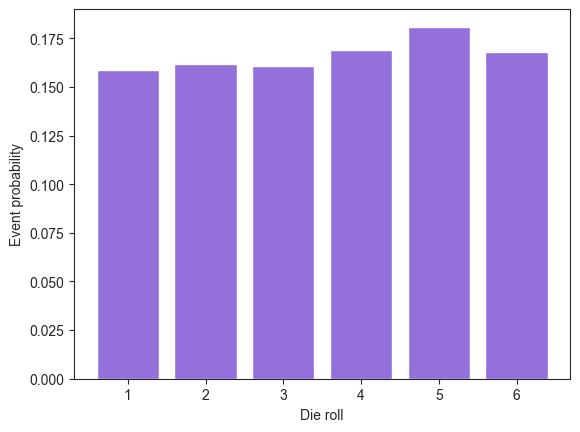

In [46]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

As in the binomial case, multinomial distributions are created by sampling $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$: 

In [47]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 0, 0, 1])

Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; NFL teams), not just integer values, we can't always calculate an expected value.

### Poisson Distribution

**Poisson** is a third widely-used distribution for discrete random variables and it's the final distribution we'll cover.

It's named after French mathematician Simeon Denis Poisson and is used for count data, e.g.: 

* Number of cars that drive by in a minute
* Number of guests at restaurant in an evening
* Number of new hires in a month

First argument to NumPy `poisson()` method is $\lambda$, which must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5.

In [48]:
lam=5

Second argument is number of samples to draw: 

In [49]:
n=1000

In [50]:
samples = np.random.poisson(lam, n) 

In [51]:
samples[0:20]

array([ 6,  3,  1,  4,  3,  3,  6,  4,  5,  4,  6,  1,  4, 10,  4,  8,  3,
        1,  7,  3])

In [52]:
x, x_count = np.unique(samples, return_counts=True)

In [53]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [54]:
x_count

array([  5,  43, 106, 133, 161, 161, 141, 117,  64,  35,  20,  10,   2,
         2], dtype=int64)

In [55]:
Px = x_count/n

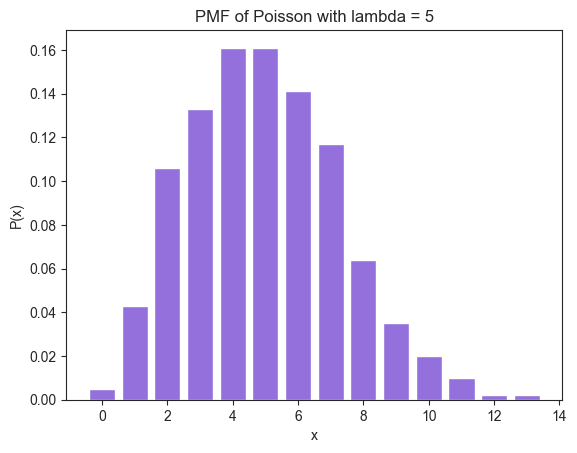

In [56]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

### Mixture Distributions

Multinomial distribution (driven by `np.random.choice()`) with probabilities set by `coefficients` array determines which of the three distributions to sample from.

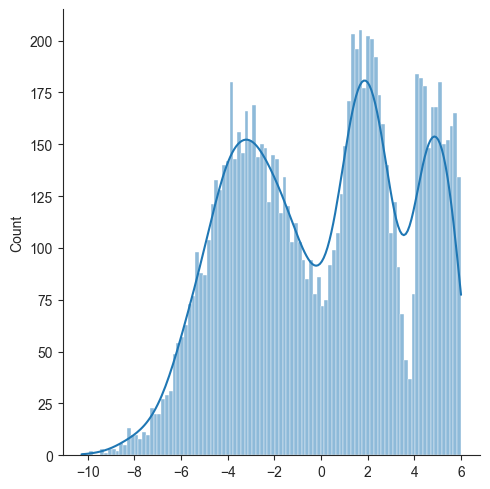

In [57]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

**Gaussian mixture model** (GMM) is common type of mixture distribution, wherein all of the component distributions are normal.